# PCA


In [2]:
# For reading data sets from the web.
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# We will grab another data set using Keras
# after we finish up with Iris...
import keras
from sklearn import preprocessing

Using TensorFlow backend.


In [3]:
## load in data and split into x train and y train
data = np.array(pandas.read_csv("trainingdata.csv", header=0))
print(data[:5])
data.shape

[[-43.66666667 -47.4        -50.         -53.33333333 -55.2
  -57.           0.        ]
 [-43.5        -46.25       -49.6        -54.         -54.8
  -56.6          0.        ]
 [-43.66666667 -45.25       -50.2        -54.5        -55.
  -55.8          0.        ]
 [-43.5        -47.         -52.6        -53.75       -54.8
  -57.           0.        ]
 [-44.2        -46.25       -50.         -53.2        -54.4
  -55.6          0.        ]]


In [10]:
# vectors AND class labels...
X = data[:,0:6] # 0 thru 30
Y = data[:,6] # 30
# standardize X
X = preprocessing.scale(X)
# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(Matrix(np.unique(Y)).T)

[0.0  1.0  2.0]

In [11]:
# Mean center the vector - center data around 0
def mean_center(x):
    return x- np.mean(x)

#Call for each col in the data (move along axis 0 or the rows)
Xcentered = np.apply_along_axis(mean_center,0,X)

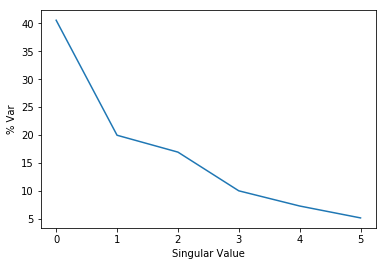

In [12]:
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [13]:
# Variance accounted for in the first two principal components
100.0*(S[0]+S[1])/np.sum(S)

In [14]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)
# Extract just the first two principal components!
PCs = Xrotated[:,0:2]
PCs.shape

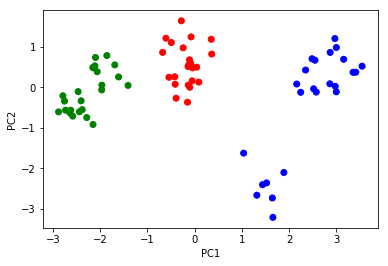

In [15]:
# The x and y values come from the two
# Principal Components and the colors for
# each point are selected based on the
# corresponding class for each point...
plt.scatter(PCs[:,0],PCs[:,1],
color=[['red','green','blue'][i] for i in Y.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [16]:
X

array([[-0.71650026, -0.61416263, -0.66494976,  0.13412923, -0.09925737,
        -0.21324528],
       [-0.6869961 , -0.15991818, -0.53854347, -0.24421767, -0.00475779,
         0.02402957],
       [-0.71650026,  0.23507699, -0.72815291, -0.52797784, -0.05200758,
         0.49857928],
       [-0.6869961 , -0.45616456, -1.48659065, -0.10233758, -0.00475779,
        -0.21324528],
       [-0.81091356, -0.15991818, -0.66494976,  0.20979861,  0.08974179,
         0.6172167 ],
       [-1.07055015, -0.14016842, -0.8545592 ,  0.32330268,  0.13699158,
         0.37994185],
       [-0.74010359, -0.29816649, -0.53854347,  0.32330268, -0.09925737,
         0.6172167 ],
       [-0.95253352, -0.37716553, -0.34893403,  0.66381488, -0.05200758,
         0.49857928],
       [-1.0233435 , -0.37716553, -0.34893403,  0.32330268, -0.05200758,
         0.37994185],
       [-0.88172354,  0.17582771, -0.34893403,  0.32330268, -0.05200758,
         0.26130442],
       [-0.73125234, -0.06116939, -0.34893403,  0.